## A Aditya Bhardwaj
### Reg No. : 22226

### <center> RM(Lab) - Linear Models for Regresssion

### Installing Necessary Packages

In [81]:
install.packages("car")
install.packages("corrplot")
install.packages("caret")
install.packages("pRoc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘pRoc’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘pROC’ ?”


### Simple Linear Regression on mtcars datasset

In [82]:
# Loading the mtcars dataset
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [83]:
# Fit a simple linear regression model of mpg against weights
model <- lm(mpg ~ wt, data = mtcars)

# here mpg is the response and wt is the predictor

In [84]:
# Printing the summary o the model
summary(model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [85]:
library(ggplot2)

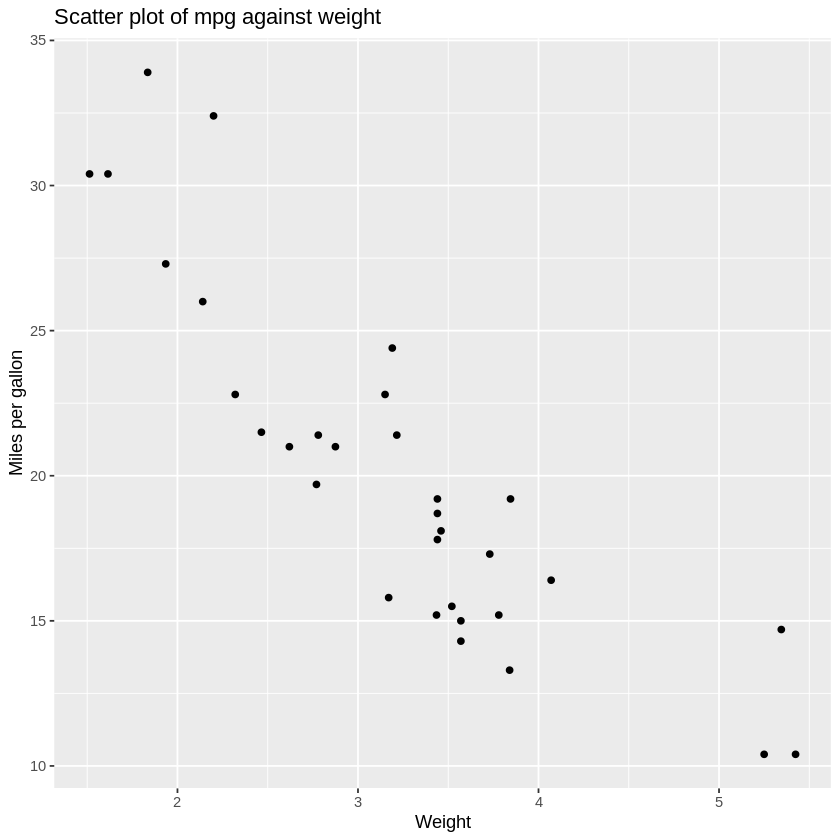

In [86]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(x = "Weight", y = "Miles per gallon") +
  ggtitle("Scatter plot of mpg against weight")

### Visualizing the Single Linear Regresssion

`geom_smooth()` using formula = 'y ~ x'


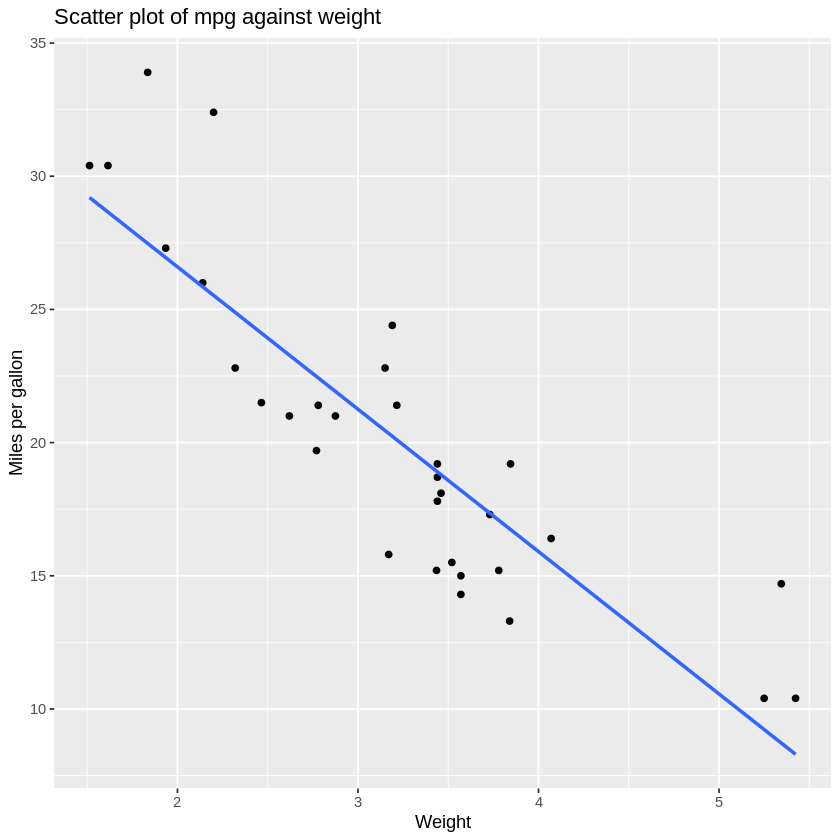

In [87]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(x = "Weight", y = "Miles per gallon") +
  ggtitle("Scatter plot of mpg against weight") +
  geom_smooth(method = "lm", se = FALSE)

### Multiple Linear Regression

In [88]:
# Taking the same mtcars dataset 

# Fitting the multiple linear regression model with mpg as the response variable and cyl, disp, hp and wt as the predictors
model_mlr = lm(mpg ~ cyl + disp + hp + wt, data = mtcars)

In [89]:
summary(model_mlr)


Call:
lm(formula = mpg ~ cyl + disp + hp + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0562 -1.4636 -0.4281  1.2854  5.8269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.82854    2.75747  14.807 1.76e-14 ***
cyl         -1.29332    0.65588  -1.972 0.058947 .  
disp         0.01160    0.01173   0.989 0.331386    
hp          -0.02054    0.01215  -1.691 0.102379    
wt          -3.85390    1.01547  -3.795 0.000759 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.513 on 27 degrees of freedom
Multiple R-squared:  0.8486,	Adjusted R-squared:  0.8262 
F-statistic: 37.84 on 4 and 27 DF,  p-value: 1.061e-10


### Visualizing the Multiple Linear Regression Model

`geom_smooth()` using formula = 'y ~ x'


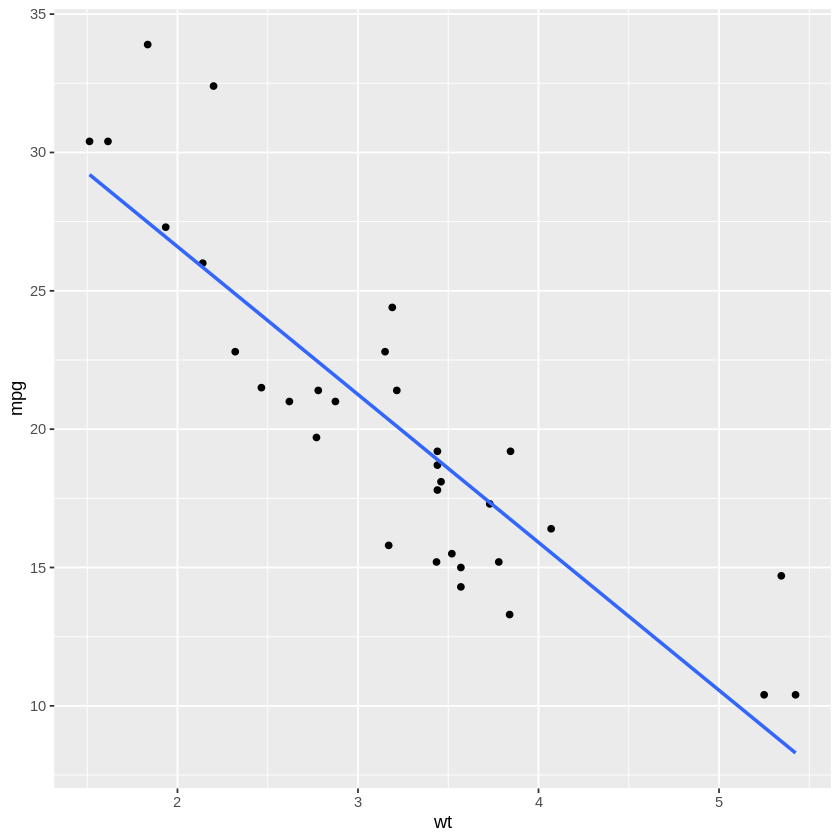

In [90]:
# Create a scatter plot of mpg vs. wt, with a regression line

ggplot(mtcars, aes(x = wt, y = mpg)) +
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


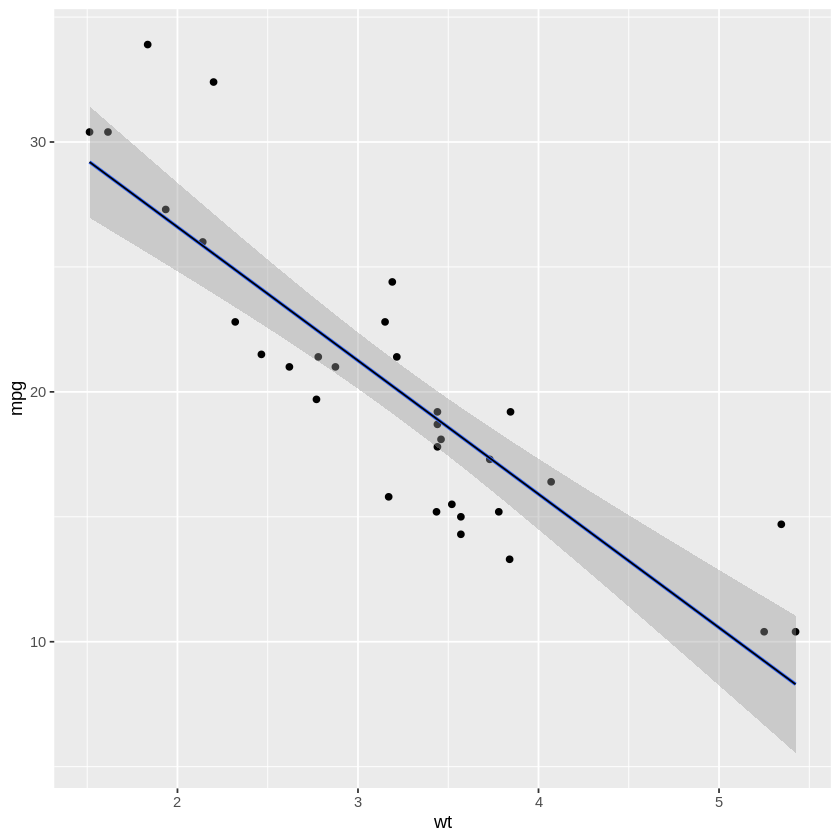

In [91]:
# Add the predicted values from the model to the scatter plot

ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = TRUE) +
  geom_line(aes(x = wt, y = predict(model)))

### Multicollinearity of the mtcars dataset

In [13]:
library(car)
library(corrplot)

vif_values <- vif(model_mlr)
vif_values

Loading required package: carData

corrplot 0.92 loaded



cyl      disp        hp        wt 
 6.737707 10.373286  3.405983  4.848016

In [14]:
cor_matrix <- cor(mtcars)
cor_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


### Now Visualizing the Multicollinearlity

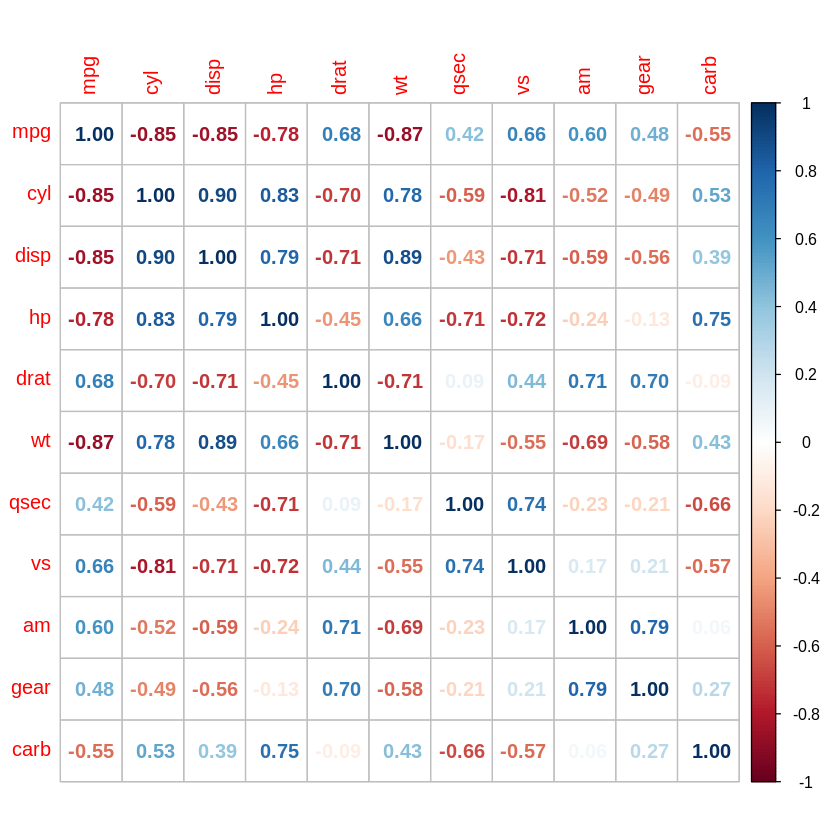

In [15]:
corrplot(cor_matrix, method = "number")

### Residual Analysis

In [16]:
actual = mtcars["mpg"]
df <- data.frame(actual, predicted = predict(model_mlr), residuals = residuals(model_mlr))
df

,mpg,predicted,residuals
,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,22.56805,-1.56804806
Mazda RX4 Wag,21.0,21.58530,-0.58530266
Datsun 710,22.8,26.05685,-3.25685052
Hornet 4 Drive,21.4,21.41170,-0.01170091
Hornet Sportabout,18.7,17.80606,0.89393888
Valiant,18.1,20.18741,-2.08741154
Duster 360,14.3,15.86737,-1.56736731
Merc 240D,24.4,23.78953,0.61046532
Merc 230,22.8,23.19749,-0.39748889


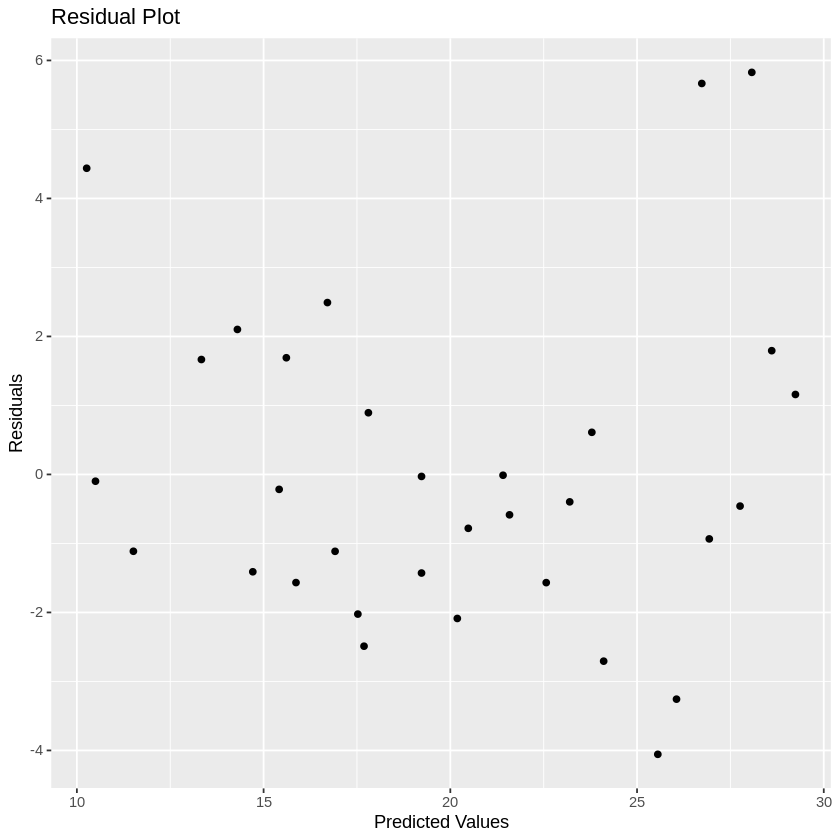

In [17]:
# Create a scatter plot of the residuals vs predicted values

ggplot(df, aes(x = predicted, y = residuals)) + geom_point()+
                 xlab("Predicted Values")+
                 ylab("Residuals")+
                 ggtitle("Residual Plot")

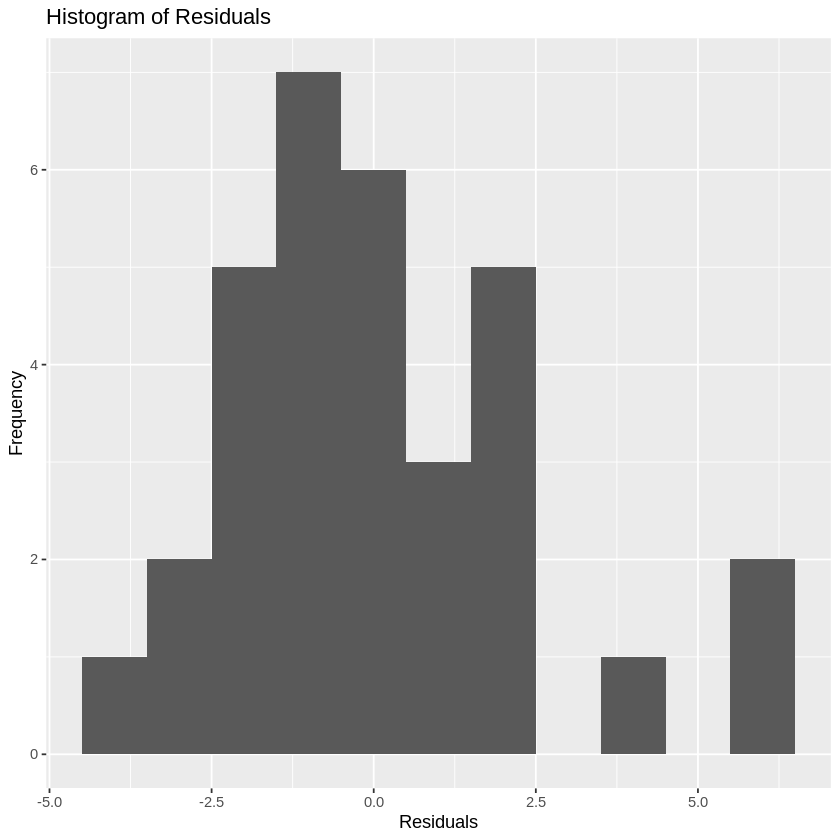

In [18]:
# Create a histogram of the residuals

ggplot(df, aes(x = residuals)) +
  geom_histogram(binwidth = 1) +
  xlab("Residuals") +
  ylab("Frequency") +
  ggtitle("Histogram of Residuals")

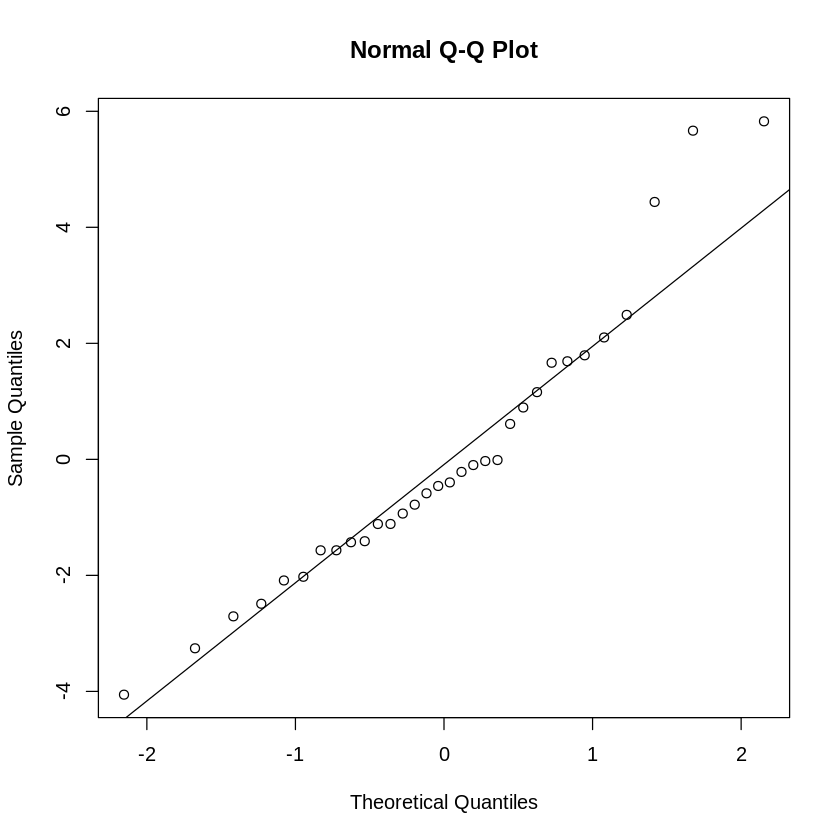

In [19]:
# Create a QQ plot of the residuals

qqnorm(residuals(model_mlr))
qqline(residuals(model_mlr))

### Logistic Regression

In [20]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
data(mtcars)

In [22]:
# Converting the cyl variable to a factor
mtcars$cyl <- as.factor(mtcars$cyl)

In [23]:
# Fit a logistic regression model with vs as the response variable
model_logit <- glm(vs ~ wt + hp, data = mtcars, family = binomial(link = "logit"))

In [24]:
summary(model_logit) # model summary


Call:
glm(formula = vs ~ wt + hp, family = binomial(link = "logit"), 
    data = mtcars)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  7.41037    3.42975   2.161   0.0307 *
wt           1.00334    1.23161   0.815   0.4153  
hp          -0.08535    0.03602  -2.369   0.0178 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 16.109  on 29  degrees of freedom
AIC: 22.109

Number of Fisher Scoring iterations: 7


In [25]:
# Create a sequence of predictor variable values
x_seq <- seq(min(mtcars$wt), max(mtcars$wt), length = 100)
df <- data.frame(wt = x_seq, hp = median(mtcars$hp))
head(df)

,wt,hp
,<dbl>,<dbl>
1,1.513000,123
2,1.552505,123
3,1.592010,123
4,1.631515,123
5,1.671020,123
6,1.710525,123


In [26]:
# Predict the probability of vs=1 for each value of wt in the sequence
y_prob <- predict(model_logit, newdata = df, type = "response")
df$y_prob <- y_prob
head(df)

,wt,hp,y_prob
,<dbl>,<dbl>,<dbl>
1,1.513000,123,0.1723328
2,1.552505,123,0.1780600
3,1.592010,123,0.1839353
4,1.631515,123,0.1899596
5,1.671020,123,0.1961338
6,1.710525,123,0.2024585


### Now Visualizing the Logistic Regression

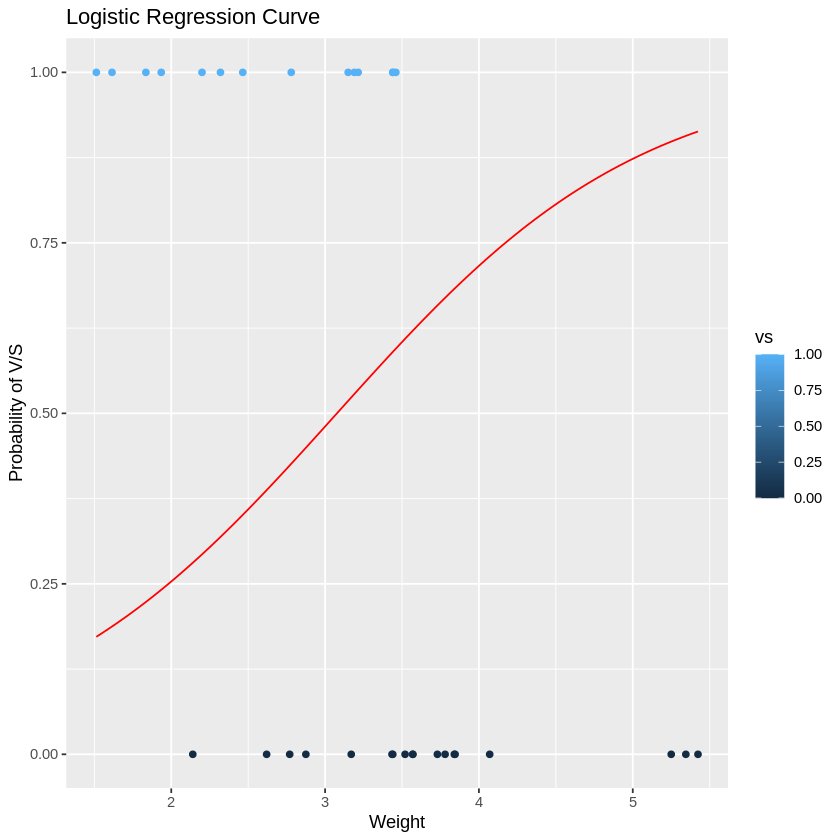

In [27]:
library(ggplot2)
ggplot(data = mtcars, aes(x = wt, y = vs)) +
  geom_point(aes(color = vs)) +
  geom_line(data = df, aes(x = x_seq, y = y_prob), color = "red") +
  labs(x = "Weight", y = "Probability of V/S") +
  ggtitle("Logistic Regression Curve")

### Poisson Regression

In [28]:
library(MASS)
data(Insurance)
head(Insurance)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,District,Group,Age,Holders,Claims
,<fct>,<ord>,<ord>,<int>,<int>
1,1,<1l,<25,197,38
2,1,<1l,25-29,264,35
3,1,<1l,30-35,246,20
4,1,<1l,>35,1680,156
5,1,1-1.5l,<25,284,63
6,1,1-1.5l,25-29,536,84


In [29]:
model_poisson <- glm(Claims ~ District + Group + Age, data = Insurance, family = "poisson")
summary(model_poisson)


Call:
glm(formula = Claims ~ District + Group + Age, family = "poisson", 
    data = Insurance)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.92306    0.03355 116.924  < 2e-16 ***
District2   -0.43822    0.04297 -10.198  < 2e-16 ***
District3   -0.91521    0.05032 -18.187  < 2e-16 ***
District4   -1.44367    0.06158 -23.445  < 2e-16 ***
Group.L     -0.51133    0.04932 -10.368  < 2e-16 ***
Group.Q     -1.02479    0.04198 -24.413  < 2e-16 ***
Group.C      0.21633    0.03304   6.547 5.87e-11 ***
Age.L        1.50084    0.04916  30.527  < 2e-16 ***
Age.Q        0.47465    0.04882   9.722  < 2e-16 ***
Age.C        0.41495    0.04847   8.560  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4236.68  on 63  degrees of freedom
Residual deviance:  121.31  on 54  degrees of freedom
AIC: 458.63

Number of Fisher Scoring iterations: 4


In [30]:
predicted <- predict(model_poisson, newdata = Insurance[1:4], type = "response")

In [31]:
df_pois <- cbind(Insurance, predicted)

In [32]:
head(df_pois)

,District,Group,Age,Holders,Claims,predicted
,<fct>,<ord>,<ord>,<int>,<int>,<dbl>
1,1,<1l,<25,197,38,17.16806
2,1,<1l,25-29,264,35,30.28775
3,1,<1l,30-35,246,20,33.96126
4,1,<1l,>35,1680,156,154.81238
5,1,1-1.5l,<25,284,63,46.18494
6,1,1-1.5l,25-29,536,84,81.47910


In [33]:
mean(df_pois$predicted)

[1] 49.23438

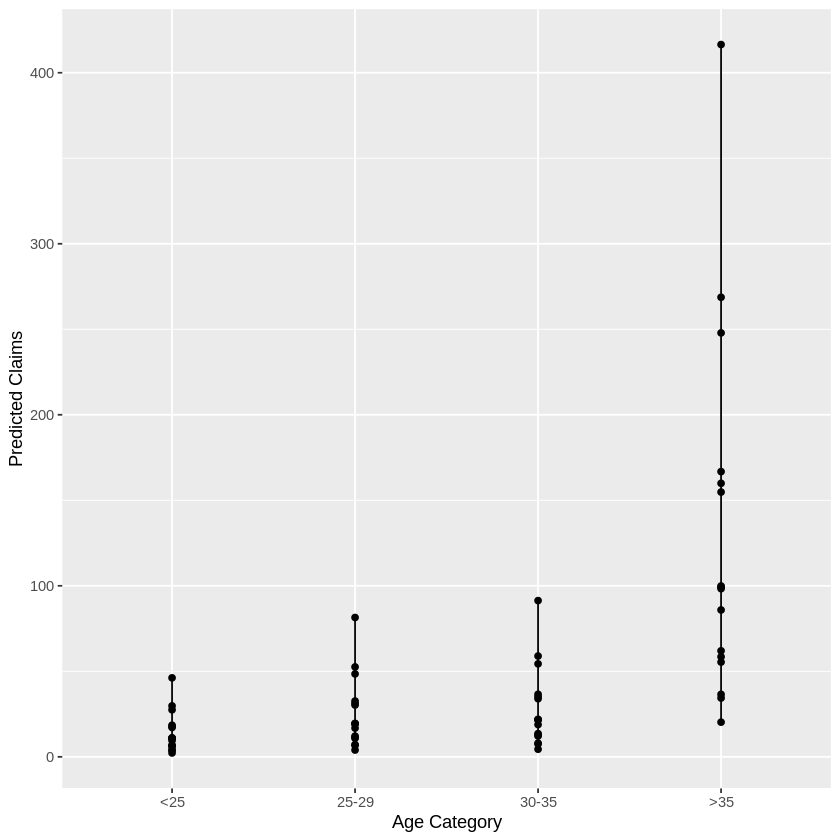

In [34]:
ggplot(df_pois, aes(x = Age, y = predicted)) +
  geom_point() +
  geom_line() +
  labs(x = "Age Category", y = "Predicted Claims")

### Confusion Matrix

In [43]:
library(ggplot2)
library(caret)

# Load iris dataset
data(iris)

In [44]:
# Split data into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = .8, list = FALSE, times = 1)
trainData <- iris[trainIndex,]
testData <- iris[-trainIndex,]

In [45]:
# Fit a Logistic Regression model
logitMod <- glm(Species ~ ., data = trainData, family = binomial(link = "logit"))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [46]:
# Make predictions on the testing set
predicted <- predict(logitMod, newdata = testData, 
                     type = "response")
predictedClass <- ifelse(predicted > 0.5, "versicolor", "setosa")

In [48]:
# Convert the predictedClass variable to a factor with the same levels as Species
predictedClass <- factor(predictedClass, levels = levels(testData$Species))

# Create confusion matrix
confusionMatrix(predictedClass, testData$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10        10
  virginica       0          0         0

Overall Statistics
                                          
               Accuracy : 0.6667          
                 95% CI : (0.4719, 0.8271)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 0.0001938       
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.0000
Specificity                 1.0000            0.5000           1.0000
Pos Pred Value              1.0000            0.5000              NaN
Neg Pred Value              1.0000            1.0000           0.6667
P

In [49]:
# Convert confusion matrix to data frame
conf_matrix <- as.data.frame(confusionMatrix(predictedClass, testData$Species)$table)
colnames(conf_matrix) <- c("predicted", "actual", "count")

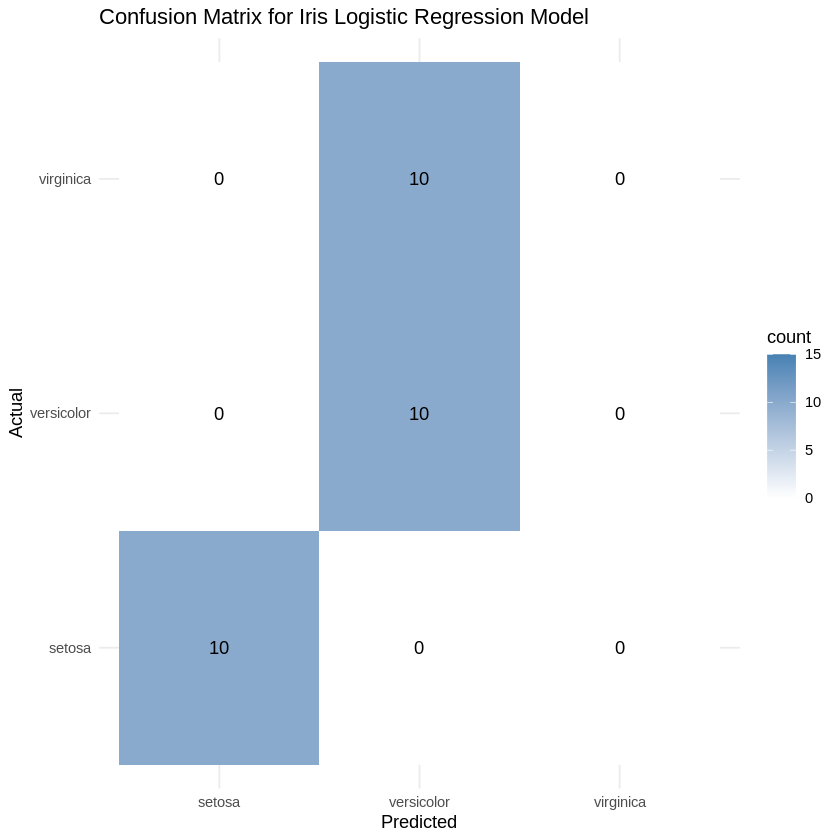

In [50]:
# Plot confusion matrix using ggplot
ggplot(conf_matrix, aes(x = predicted, y = actual, fill = count)) + 
  geom_tile() +
  geom_text(aes(label = count)) +
  scale_fill_gradient(low = "white", high = "steelblue", limits = c(0, 15)) +
  theme_minimal() +
  labs(x = "Predicted", y = "Actual", 
       title = "Confusion Matrix for Iris Logistic Regression Model")

### Roc curve

In [72]:
install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [73]:
library(pROC)
library(ggplot2)
library(mlbench)

In [74]:
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


In [75]:
# Split the data into training and testing sets
set.seed(123)
trainIndex <- sample(nrow(PimaIndiansDiabetes), round(0.8 * nrow(PimaIndiansDiabetes)))
trainData <- PimaIndiansDiabetes[trainIndex, ]
testData <- PimaIndiansDiabetes[-trainIndex, ]

In [76]:
# Fit a logistic regression model on the training data
model <- glm(diabetes ~., data = trainData, family = "binomial")

In [77]:
# Make predictions on the testing data
pred <- predict(model, newdata = testData, type = "response")

In [78]:
# Create a ROC curve
roc <- roc(testData$diabetes, pred)

Setting levels: control = neg, case = pos

Setting direction: controls < cases



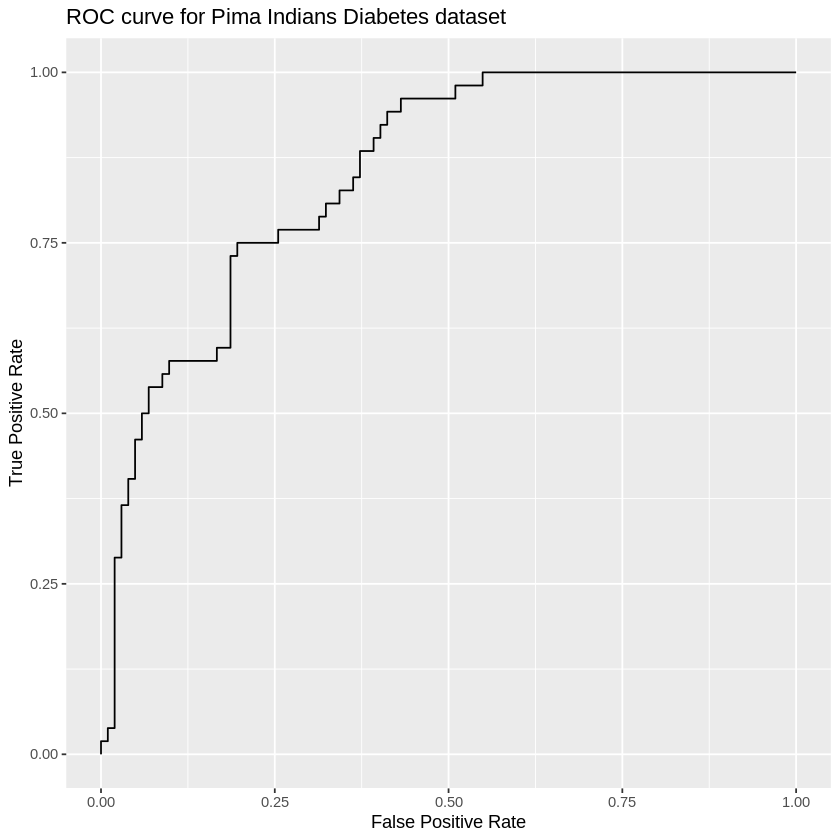

In [96]:
ggroc(roc, legacy.axes = TRUE)+
  ggtitle("ROC curve for Pima Indians Diabetes dataset") +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")